<a href="https://colab.research.google.com/github/yoshinaga2904/Bootcamp-Alura/blob/main/Modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from zipfile import ZipFile


#caminho para acesso a pasta zip no drive google
caminho = '/content/drive/MyDrive/PENSE_2015/PeNSE_2015_AMOSTRA2.zip'

#Criando caminho
zip = ZipFile(caminho)

#acessando o arquivo escolhido dentro da pasta zip
acesso_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(acesso_pasta_zipada),sep=';', thousands='.', decimal=',')
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [124]:
zip = ZipFile(caminho)
zip.namelist()[1]

'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

In [125]:
dados.shape

(16556, 181)

In [126]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [ ]:
# dados.select_dtypes(include='object')

,VB17003,VB17004,PESO
0,"37,1",157,"299,735235"
1,"50,2",152,"355,170081"
2,"48,2","161,4","299,735235"
3,"69,4","172,5","355,170081"
4,"78,9","167,5","299,735235"
...,...,...,...
16551,"56,7","167,9","447,815539"
16552,"61,9","185,8","592,50744"
16553,"60,9","159,4","401,131512"
16554,"47,3","157,8","442,718091"


In [127]:
dados.select_dtypes(include='float')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


In [128]:
dados['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [129]:
dados['VB01001'].value_counts(normalize = True)* 100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

In [130]:
frequencia_raca = dados['VB01002'].value_counts()
percentual_raca = dados['VB01002'].value_counts(normalize = True) * 100

In [131]:
raca = {1:'Branca', 
        2:'Preta',
        3:'Amarela',
        4:'Parda',
        5:'Indígena',
        99:'Nao_informado'}

distribuicao_frequencia = pd.DataFrame({'Frequencia': frequencia_raca, 'Percentual':percentual_raca})
distribuicao_frequencia.rename(index=raca, inplace=True)
distribuicao_frequencia.rename_axis('Raça', axis=1, inplace=True)
distribuicao_frequencia    

Raça,Frequencia,Percentual
Parda,6726,40.625755
Branca,6575,39.713699
Preta,1939,11.711766
Amarela,712,4.300556
Indígena,581,3.509302
Nao_informado,23,0.138922


In [132]:
dados['IMC'] = dados['VB17003'] / (dados['VB17004']/100)**2
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,IMC
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296,15.051321
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296,21.727839
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296,18.502907
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296,23.322831
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296,28.122076


In [133]:
classes = [0, 18.5, 25, 30, 60]
labels = ['Abaixo', 'Normal', 'Sobrepeso', 'Obesidade']

dados["CLASSE_IMC"] = pd.cut(x=dados['IMC'],
                             bins=classes,
                             labels = labels,
                             include_lowest = True)

dados[['IMC', 'CLASSE_IMC']].head()


,IMC,CLASSE_IMC
0,15.051321,Abaixo
1,21.727839,Normal
2,18.502907,Normal
3,23.322831,Normal
4,28.122076,Sobrepeso


In [134]:
frequencia = dados["CLASSE_IMC"].value_counts()
percentual = dados["CLASSE_IMC"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
#dist_freq.rename(index = respostas, inplace = True)
#dist_freq.rename_axis("Sentimento em relação ao seu corpo", axis=1, inplace = True)
dist_freq

,Frequência,Percentual
Normal,9188,55.496497
Abaixo,4975,30.049529
Sobrepeso,1760,10.630587
Obesidade,633,3.823387


In [135]:
alt_min = dados["VB17004"].min()
alt_max = dados["VB17004"].max()

print(f'Altura Minima {alt_min}, Altura Máxima {alt_max}')

Altura Minima 124.1, Altura Máxima 195.3


In [136]:
tamanho_amostra = len(dados)

k = int((1 + ((10/3)*np.log10(tamanho_amostra))))
k

15

In [137]:
dados["CLASSE_ALTURA"] = pd.cut(x = dados["VB17004"],
       bins = k,
       include_lowest = True)

frequencia = dados["CLASSE_ALTURA"].value_counts()
percentual = dados["CLASSE_ALTURA"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
dist_freq

,Frequência,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


In [138]:
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"])
frequencia_cruzada

VB01001,1,2
VB11007,,
1,2682,1926
2,3490,3430
3,950,857
4,786,1540
5,260,454
99,119,62


In [139]:
respostas = {
    1: "Muito satisfeito",
    2: "Satisfeito",
    3: "Indiferente",
    4: "Insatisfeito",
    5: "Muito instisfeito",
    99: "Não Informado"}

In [140]:
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"])
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,2682,1926
Satisfeito,3490,3430
Indiferente,950,857
Insatisfeito,786,1540
Muito instisfeito,260,454
Não Informado,119,62


In [141]:
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = True)
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,0.161996,0.116332
Satisfeito,0.210800,0.207176
Indiferente,0.057381,0.051764
Insatisfeito,0.047475,0.093018
Muito instisfeito,0.015704,0.027422
Não Informado,0.007188,0.003745


In [142]:
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = "columns") * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,32.363944,23.291813
Satisfeito,42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito,9.484735,18.623776
Muito instisfeito,3.137444,5.490386
Não Informado,1.435984,0.749788


In [143]:
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = "index") * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,58.203125,41.796875
Satisfeito,50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito,33.791917,66.208083
Muito instisfeito,36.414566,63.585434
Não Informado,65.745856,34.254144


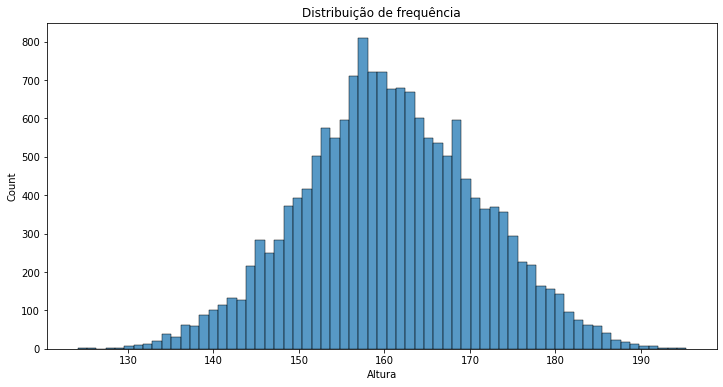

In [144]:
ax = sns.histplot(data=dados, x=dados['VB17004'])
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax;

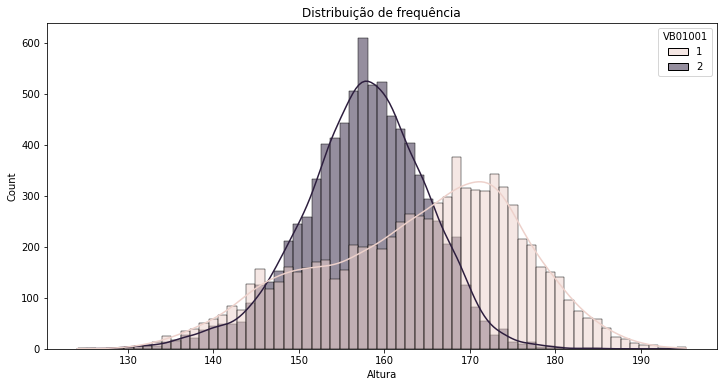

In [145]:
ax = sns.histplot(data=dados, x='VB17004', hue='VB01001', kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax;

## Desafio 01: Descompactar a pasta zipada usando outro método (Dica Allan, é utilizar comandos Bash).


In [146]:
#!unzip /content/drive/MyDrive/PENSE_2015/PeNSE_2015_AMOSTRA2.zip -d /content/drive/MyDrive/PENSE_2015/

In [147]:
# dados_teste = pd.read_csv('/content/drive/MyDrive/PENSE_2015/arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV', sep=';')
# dados_teste.head()

## Desafio 02: Estudar sobre a base de dados que vamos trabalhar.

video sugerido no Discord: 

fonte: https://www.youtube.com/watch?v=z4BBCHZUvD4

## Desafio 03 - Classificar algumas perguntas como QualitativaXQuantitativa

In [148]:
# colunas = (np.random.rand(15)*100).round().astype('int64')
# colunas

In [149]:
colunas = [85, 18,  5, 36, 28, 53, 31, 30, 11, 25, 92, 26, 72, 87, 81]

In [150]:
desafio_3 = pd.read_csv(zip.open(acesso_pasta_zipada),sep=';', thousands='.', decimal=',', usecols=colunas)
desafio_3.head()

,VB01002,VB01008A,VB01016,VB01023,VB01024,VB01026,VB02002,VB02004A,VB02018A,VB03007,VB05002,VB06002,VB06006,VB07002,VB07007
0,1,7,1,2,2,1,3,4,6,1,2,-1,1,5,1
1,1,7,1,2,2,3,2,1,1,7,2,-1,1,5,1
2,4,5,1,2,2,3,3,1,1,7,1,-1,1,5,2
3,1,7,1,2,2,3,4,1,5,-1,2,-1,1,4,1
4,1,5,1,2,2,5,3,5,5,5,1,-1,2,4,2


In [151]:
colunas_desafio_3 = {'VB01002':'Qual é a sua cor ou raça?', 
                     'VB01008A':'Qual nível de ensino (grau) sua mãe estudou ou estuda?', 
                     'VB01016':'Você tem acesso à internet em sua casa?', 
                     'VB01023':'Você estuda em regime integral (tem atividades escolares por 7 horas ou mais horas diárias, durante todo o período escolar)?' , 
                     'VB01024':'Você estuda em regime de internato (a escola possui alojamento onde os alunos permanecem e dormem diariamente, durante todo o período escolar)?',
                     'VB01026':'Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende?',
                     'VB02002':'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu salgados fritos? Exemplo: batata frita (sem contar a batata de pacote) ou salgados fritos como coxinha de galinha, quibe frito, pastel frito, acarajé etc.', 
                     'VB02004A':'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu pelo menos um tipo de legume ou verdura? Exemplos: alface, abóbora, brócolis, cebola, cenoura, chuchu, couve, espinafre, pepino, tomate etc. Não inclua batata e aipim (mandioca/macaxeira).', 
                     'VB02018A':'Você costuma comer quando está assistindo à TV ou estudando?', 
                     'VB03007':'NORMALMENTE, quanto tempo por dia duram essas atividades (como esportes, dança, ginástica, musculação, lutas ou outra atividade) que você faz? (Sem contar as aulas de educação física)', 
                     'VB05002':'Alguma vez na vida você tomou uma dose de bebida alcoólica? (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc)', 
                     'VB06002':'Que idade você tinha quando usou droga como maconha, cocaína, crack, cola, loló, lança-perfume, ecstasy, oxy ou outra, pela primeira vez?',
                     'VB06006':'Quantos amigos seus usam drogas?', 
                     'VB07002':'NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis sabiam realmente o que você estava fazendo em seu tempo livre?', 
                     'VB07007':'NOS ÚLTIMOS 30 DIAS, com que frequência algum dos seus colegas de escola te esculacharam, zoaram, mangaram, intimidaram ou caçoaram tanto que você ficou magoado, incomodado, aborrecido, ofendido ou humilhado?'
                     }
desafio_3 = desafio_3.rename(columns=colunas_desafio_3)
desafio_3

,Qual é a sua cor ou raça?,Qual nível de ensino (grau) sua mãe estudou ou estuda?,Você tem acesso à internet em sua casa?,"Você estuda em regime integral (tem atividades escolares por 7 horas ou mais horas diárias, durante todo o período escolar)?","Você estuda em regime de internato (a escola possui alojamento onde os alunos permanecem e dormem diariamente, durante todo o período escolar)?","Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende?","NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu salgados fritos? Exemplo: batata frita (sem contar a batata de pacote) ou salgados fritos como coxinha de galinha, quibe frito, pastel frito, acarajé etc.","NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu pelo menos um tipo de legume ou verdura? Exemplos: alface, abóbora, brócolis, cebola, cenoura, chuchu, couve, espinafre, pepino, tomate etc. Não inclua batata e aipim (mandioca/macaxeira).",Você costuma comer quando está assistindo à TV ou estudando?,"NORMALMENTE, quanto tempo por dia duram essas atividades (como esportes, dança, ginástica, musculação, lutas ou outra atividade) que você faz? (Sem contar as aulas de educação física)",Alguma vez na vida você tomou uma dose de bebida alcoólica? (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc),"Que idade você tinha quando usou droga como maconha, cocaína, crack, cola, loló, lança-perfume, ecstasy, oxy ou outra, pela primeira vez?",Quantos amigos seus usam drogas?,"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis sabiam realmente o que você estava fazendo em seu tempo livre?","NOS ÚLTIMOS 30 DIAS, com que frequência algum dos seus colegas de escola te esculacharam, zoaram, mangaram, intimidaram ou caçoaram tanto que você ficou magoado, incomodado, aborrecido, ofendido ou humilhado?"
0,1,7,1,2,2,1,3,4,6,1,2,-1,1,5,1
1,1,7,1,2,2,3,2,1,1,7,2,-1,1,5,1
2,4,5,1,2,2,3,3,1,1,7,1,-1,1,5,2
3,1,7,1,2,2,3,4,1,5,-1,2,-1,1,4,1
4,1,5,1,2,2,5,3,5,5,5,1,-1,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,4,7,1,2,2,3,7,5,2,7,-1,-1,-1,5,3
16552,1,7,1,1,2,4,2,4,6,7,2,-1,1,5,1
16553,4,7,1,2,2,4,1,8,5,-1,2,-1,6,5,4
16554,4,7,1,1,2,3,5,6,1,4,1,-1,2,4,1


In [152]:
print(f'{desafio_3.columns[0]} \n variável qualitativa nominal \n')
print(f'{desafio_3.columns[1]} \n variável qualitativa nominal \n')
print(f'{desafio_3.columns[2]} \n variável qualitativa nominal \n')
print(f'{desafio_3.columns[3]} \n variável qualitativa nominal \n')
print(f'{desafio_3.columns[4]} \n variável qualitativa nominal \n')
print(f'{desafio_3.columns[5]} \n variável qualitativa nominal \n')
print(f'{desafio_3.columns[6]} \n variável qualitativa ordinal \n')
print(f'{desafio_3.columns[7]} \n variável qualitativa ordinal \n')
print(f'{desafio_3.columns[8]} \n variável qualitativa ordinal \n')
print(f'{desafio_3.columns[9]} \n variável qualitativa ordinal \n')
print(f'{desafio_3.columns[10]} \n variável qualitativa nominal \n')
print(f'{desafio_3.columns[11]} \n variável quantitativa discreta \n')
print(f'{desafio_3.columns[12]} \n variável qualitativa nominal \n')
print(f'{desafio_3.columns[13]} \n variável qualitativa nominal \n')
print(f'{desafio_3.columns[14]} \n variável qualitativa nominal \n')

Qual é a sua cor ou raça? 
 variável qualitativa nominal 

Qual nível de ensino (grau) sua mãe estudou ou estuda? 
 variável qualitativa nominal 

Você tem acesso à internet em sua casa? 
 variável qualitativa nominal 

Você estuda em regime integral (tem atividades escolares por 7 horas ou mais horas diárias, durante todo o período escolar)? 
 variável qualitativa nominal 

Você estuda em regime de internato (a escola possui alojamento onde os alunos permanecem e dormem diariamente, durante todo o período escolar)? 
 variável qualitativa nominal 

Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende? 
 variável qualitativa nominal 

NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu salgados fritos? Exemplo: batata frita (sem contar a batata de pacote) ou salgados fritos como coxinha de galinha, quibe frito, pastel frito, acarajé etc. 
 variável qualitativa ordinal 

NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu pelo menos um tipo de legume ou verdura? Exemp

## DEsafio 04: Criar uma função para gerar as tabelas de frequência e fazer a análise de outras informações

In [153]:
def frequencia_e_percentual(pesquisa, dicionario_axis, nome_axis):

  frequencia = dados[pesquisa].value_counts()
  percentual = dados[pesquisa].value_counts(normalize = True) * 100

  distribuicao_frequencia = pd.DataFrame({'Frequencia': frequencia, 'Percentual':percentual})
  distribuicao_frequencia.rename(index=dicionario_axis, inplace=True)
  distribuicao_frequencia.rename_axis(nome_axis, axis=1, inplace=True)
  
  return distribuicao_frequencia 

In [154]:
NOS_ULTIMOS_30_DIAS_quantas_vezes_voce_foi_agredido_fisicamente_por_um_adulto_da_sua_familia = {
1:	'Nenhuma vez nos últimos 30 dias (0 vez)',
2:	'1 vez nos últimos 30 dias',
3:	'2 ou 3 vezes nos últimos 30 dias',
4:	'4 ou 5 vezes nos últimos 30 dias',
5:	'6 ou 7 vezes nos últimos 30 dias',
6:	'8 ou 9 vezes nos últimos 30 dias',
7:	'10 ou 11 vezes nos últimos 30 dias',
8:	'12 vezes ou mais nos últimos 30 dias',
99:	'Não informado'}

In [155]:
frequencia_e_percentual('VB09003',
                        NOS_ULTIMOS_30_DIAS_quantas_vezes_voce_foi_agredido_fisicamente_por_um_adulto_da_sua_familia,
                        'Agressões Físicas Sofridas')

Agressões Físicas Sofridas,Frequencia,Percentual
Nenhuma vez nos últimos 30 dias (0 vez),14164,85.552066
1 vez nos últimos 30 dias,962,5.810582
2 ou 3 vezes nos últimos 30 dias,439,2.651607
12 vezes ou mais nos últimos 30 dias,254,1.534187
4 ou 5 vezes nos últimos 30 dias,218,1.316743
Não informado,161,0.972457
6 ou 7 vezes nos últimos 30 dias,158,0.954337
8 ou 9 vezes nos últimos 30 dias,119,0.718773
10 ou 11 vezes nos últimos 30 dias,81,0.489249


## Desafio 05: Criar uma tabela de frequência para o peso

In [156]:
peso_min = dados["VB17003"].min()
peso_max = dados["VB17003"].max()

print(f'Peso Minima {peso_min}, Peso Máxima {peso_max}')

Peso Minima 0.8, Peso Máxima 171.5


In [157]:
tamanho_amostra = len(dados)

k = int((1 + ((10/3)*np.log10(tamanho_amostra))))
k

15

In [158]:
dados["CLASSE_PESO"] = pd.cut(x = dados["VB17003"],
       bins = k,
       include_lowest = True)

frequencia = dados["CLASSE_PESO"].value_counts()
percentual = dados["CLASSE_PESO"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
dist_freq

,Frequência,Percentual
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179
"(80.46, 91.84]",544,3.285818
"(91.84, 103.22]",202,1.220101
"(103.22, 114.6]",77,0.465088
"(114.6, 125.98]",20,0.120802
"(125.98, 137.36]",15,0.090602


## Desafio 06: Criar outros crosstab para analisar e pesquisar sobre o parâmetro aggfunc e testar.

In [159]:
dicionario_sus = {
-1:	'Pulo no questionário',
1:	'Apoio para controle de peso (ganhar ou perder)',
2:	'Apoio para parar de fumar',
3:	'Acidente ou lesão',
4:	'Reabilitação ou terapia',
5:	'Doença',
6:	'Problema odontológico',
7:	'Vacinação',
8:	'Consulta para métodos contraceptivos (preservativos, pílula, DIU etc)',
9:	'Buscar contracepção de emergência (pílula do dia seguinte)',
10:	'Teste para HIV, Sífilis ou Hepatite B',
11:	'Pré-natal / Teste para gravidez',
12:	'Solicitação de atestado médico',
13:	'Outro',
99:	'Não informado'}

In [160]:
sus = pd.crosstab(dados['VB13007'], dados['REGEOGR'])
sus.rename(index=dicionario_sus, inplace=True)
sus.rename(columns={1:	'Norte', 2:	'Nordeste', 3:	'Sudeste', 4:	'Sul', 5:	'Centro-Oeste'}, inplace=True)
sus

REGEOGR,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
VB13007,,,,,
Pulo no questionário,1020,1138,1065,1083,1220
Apoio para controle de peso (ganhar ou perder),499,524,388,379,381
Apoio para parar de fumar,27,28,31,27,31
Acidente ou lesão,143,122,122,132,161
Reabilitação ou terapia,18,16,22,14,19
Doença,540,603,533,465,501
Problema odontológico,93,88,64,100,99
Vacinação,369,422,433,400,394
"Consulta para métodos contraceptivos (preservativos, pílula, DIU etc)",30,22,43,39,34


In [161]:
# Idade média de quem se consultou no sus por causa.

sus = pd.crosstab(dados['VB13007'], dados['REGEOGR'], values= dados['VB01003'], aggfunc='mean').round()
sus.rename(index=dicionario_sus, inplace=True)
sus.rename(columns={1:	'Norte', 2:	'Nordeste', 3:	'Sudeste', 4:	'Sul', 5:	'Centro-Oeste'}, inplace=True)
sus

REGEOGR,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
VB13007,,,,,
Pulo no questionário,14.0,14.0,14.0,14.0,14.0
Apoio para controle de peso (ganhar ou perder),14.0,14.0,14.0,14.0,14.0
Apoio para parar de fumar,13.0,13.0,15.0,14.0,13.0
Acidente ou lesão,15.0,14.0,14.0,14.0,14.0
Reabilitação ou terapia,14.0,14.0,15.0,14.0,14.0
Doença,15.0,15.0,14.0,15.0,14.0
Problema odontológico,15.0,15.0,15.0,14.0,14.0
Vacinação,14.0,14.0,14.0,14.0,13.0
"Consulta para métodos contraceptivos (preservativos, pílula, DIU etc)",16.0,15.0,15.0,15.0,15.0


## Desafio 07: Calcular o desvio padrão, média, moda e mediana e plotar no gráfico

In [162]:
from scipy.stats import mode

def medidas_centrais(dado):
  media = dado.mean()
  desvio_padrao = dado.std()
  moda = mode(dado).mode[0]
  mediana = dado.median()
  return media, desvio_padrao, moda, mediana

In [163]:
media, desvio_padrao, moda, mediana = medidas_centrais(dados['VB17004'])

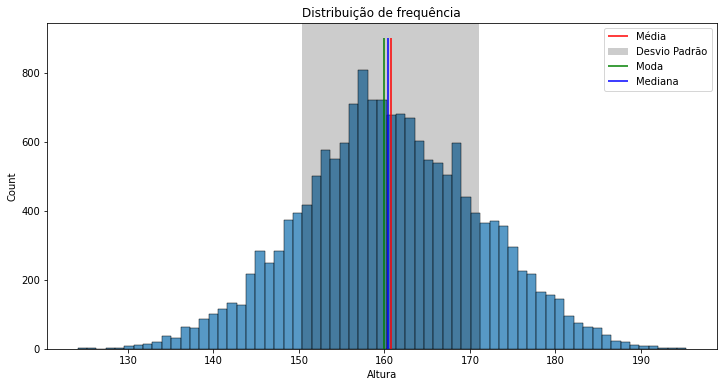

In [164]:
ax = sns.histplot(data=dados, x=dados['VB17004'])
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
line1 = ax.vlines(media, ymin=0, ymax=900, colors='r')
line2 = plt.axvspan((media - desvio_padrao), (desvio_padrao + media), facecolor='black', alpha=0.2)
line3 = ax.vlines(moda, ymin=0, ymax=900, colors='g')
line4 = ax.vlines(mediana, ymin=0, ymax=900, colors='b')
ax.legend((line1, line2, line3, line4), ('Média', 'Desvio Padrão', 'Moda', 'Mediana'))
ax;


## Desafio 08: Fazer a análise com o histograma para outras informações da base de dados.

In [182]:
media, desvio_padrao, moda, mediana = medidas_centrais(dados['VB17003'])

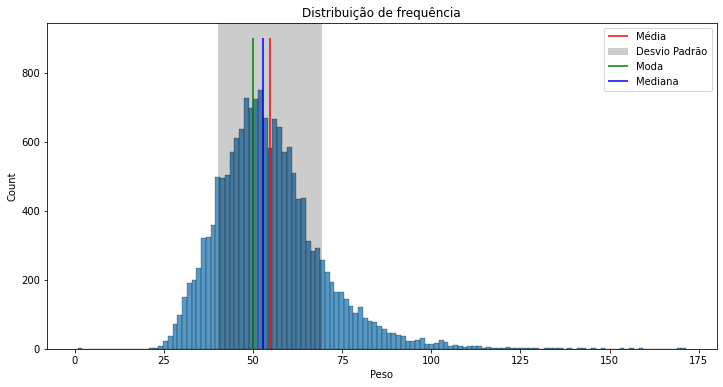

In [183]:
ax = sns.histplot(data=dados, x=dados['VB17003'])
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Peso")
line1 = ax.vlines(media, ymin=0, ymax=900, colors='r')
line2 = plt.axvspan((media - desvio_padrao), (desvio_padrao + media), facecolor='black', alpha=0.2)
line3 = ax.vlines(moda, ymin=0, ymax=900, colors='g')
line4 = ax.vlines(mediana, ymin=0, ymax=900, colors='b')
ax.legend((line1, line2, line3, line4), ('Média', 'Desvio Padrão', 'Moda', 'Mediana'))
ax;